In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Reading data into pandas dataframe

In [14]:
df=pd.read_csv('Data.csv')
#reading the data from csv file

In [15]:
df

Unnamed: 0  property_id  location_id  \
0                0       237062         3325   
1                1       346905         3236   
2                2       386513          764   
3                3       656161          340   
4                4       841645         3226   
...            ...          ...          ...   
168441      168441     17355248         6754   
168442      168442     17355249          680   
168443      168443     17355250         6757   
168444      168444     17355251         6752   
168445      168445     17355287        10045   

                                                 page_url property_type  \
0       https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat   
1       https://www.zameen.com/Property/e_11_2_service...          Flat   
2       https://www.zameen.com/Property/islamabad_g_15...         House   
3       https://www.zameen.com/Property/islamabad_bani...         House   
4       https://www.zameen.com/Property/dha_valley_dha...         House   
...                                                   ...           ...   
168441  https://www.zameen.com/Property/gulshan_e_maym...         House   
168442  https://www.zameen.com/Property/gadap_town_gul...         House   
168443  https://www.zameen.com/Property/gulshan_e_maym...         House   
168444  https://www.zameen.com/Property/gulshan_e_maym...         House   
168445  https://www.zameen.com/Property/bahria_town_ka...         House   

           price             location       city      province_name  \
0       10000000                 G-10  Islamabad  Islamabad Capital   
1        6900000                 E-11  Islamabad  Islamabad Capital   
2       16500000                 G-15  Islamabad  Islamabad Capital   
3       43500000            Bani Gala  Islamabad  Islamabad Capital   
4        7000000          DHA Defence  Islamabad  Islamabad Capital   
...          ...                  ...        ...                ...   
168441  26500000           Gadap Town    Karachi              Sindh   
168442  12500000           Gadap Town    Karachi              Sindh   
168443  27000000           Gadap Town    Karachi              Sindh   
168444  11000000           Gadap Town    Karachi              Sindh   
168445   9000000  Bahria Town Karachi    Karachi              Sindh   

         latitude  longitude  baths   purpose  bedrooms date_added  \
0       33.679890  73.012640      2  For Sale         2   2/4/2019   
1       33.700993  72.971492      3  For Sale         3   5/4/2019   
2       33.631486  72.926559      6  For Sale         5  7/17/2019   
3       33.707573  73.151199      4  For Sale         4   4/5/2019   
4       33.492591  73.301339      3  For Sale         3  7/10/2019   
...           ...        ...    ...       ...       ...        ...   
168441  25.029909  67.137192      0  For Sale         6  7/18/2019   
168442  25.017951  67.136393      0  For Sale         3  7/18/2019   
168443  25.015384  67.116330      0  For Sale         6  7/18/2019   
168444  25.013265  67.120818      0  For Sale         3  7/18/2019   
168445  25.113565  67.353811      3  For Sale         3  7/18/2019   

                            agency  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                    Easy Property   
...                            ...   
168441       Al Shahab Enterprises   
168442       Al Shahab Enterprises   
168443       Al Shahab Enterprises   
168444       Al Shahab Enterprises   
168445  ZPN Real Estate & Builders   

                                               agent  Total_Area  
0                                                NaN    1089.004  
1                                                NaN   15246.056  
2                                                NaN    2178.008  
3                                                NaN   10890.000  
4       Muhammad Junaid Ceo Muhammad Shahid 

# Data Cleaning

In [16]:
#droping rows whose city is not lahore
df = df[df['city'] =='Lahore'].copy().reset_index(drop=True)
df.shape

(41427, 18)

In [17]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [18]:
#null values
df.isnull().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           10203
agent            10204
Total_Area           0
dtype: int64

In [21]:
df.dtypes

Unnamed: 0         int64
property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Total_Area       float64
dtype: object

In [22]:
#as there are two columns with a lot of null values we can use different methods to treat null values like forward and backward fill 
#interpolation etc but in our case null values are in those columns which are not required in our data so we can drop those columns
df.drop(['agency', 'agent'], axis=1,inplace=True)
df.isnull().sum()

Unnamed: 0       0
property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
Total_Area       0
dtype: int64

In [23]:
#we are assuming that property_id and location_id doesn't carry much information and hence can be dropped. 
#'pageurl' is just for reference and hence can be dropped as well.
#'location' is dropped as well because this information is already avaialable in longitude and latitude. 
df.drop(['Unnamed: 0', 'property_id','location_id','page_url','purpose','date_added','city','province_name','location'], axis=1,inplace=True)
df

property_type      price   latitude  longitude  baths  bedrooms  \
0             House  220000000  31.483869  74.325686      0         0   
1             House   40000000  31.431593  74.179980      5         5   
2             House    9500000  31.499348  74.416959      0         3   
3             House  125000000  31.522069  74.355512      7         8   
4             House   21000000  31.506483  74.286017      5         6   
...             ...        ...        ...        ...    ...       ...   
41422         House   44000000  31.486906  74.385896      7         6   
41423         House   55000000  31.466227  74.440012      6         5   
41424         House   20500000  31.494408  74.437666      4         3   
41425         House  170000000  31.475378  74.373808      5         5   
41426         House   42500000  31.471571  74.445906      6         5   

       Total_Area  
0       32670.000  
1        5445.000  
2        2450.259  
3        5445.000  
4        2994.761  
...           ...  
41422    5445.000  
41423    5445.000  
41424    2722.510  
41425   10890.000  
41426    5445.000  

[41427 rows x 7 columns]

In [24]:
#now df contains all related columns
df.dtypes

property_type     object
price              int64
latitude         float64
longitude        float64
baths              int64
bedrooms           int64
Total_Area       float64
dtype: object

In [25]:
#dropping duplicates values and reseting index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df

property_type      price   latitude  longitude  baths  bedrooms  \
0             House  220000000  31.483869  74.325686      0         0   
1             House   40000000  31.431593  74.179980      5         5   
2             House    9500000  31.499348  74.416959      0         3   
3             House  125000000  31.522069  74.355512      7         8   
4             House   21000000  31.506483  74.286017      5         6   
...             ...        ...        ...        ...    ...       ...   
27645         House   22500000  31.442248  74.402375      3         3   
27646         House   22500000  31.438989  74.404049      3         3   
27647         House   39000000  31.468350  74.401603      6         5   
27648         House   28000000  31.359647  74.253073      7         6   
27649         House   20500000  31.494408  74.437666      4         3   

       Total_Area  
0       32670.000  
1        5445.000  
2        2450.259  
3        5445.000  
4        2994.761  
...           ...  
27645    2722.510  
27646    2722.510  
27647    5445.000  
27648    5445.000  
27649    2722.510  

[27650 rows x 7 columns]

In [26]:
df.property_type.value_counts()

House            26173
Flat              1128
Farm House         225
Upper Portion       54
Lower Portion       50
Penthouse           12
Room                 8
Name: property_type, dtype: int64

# Data transformation

In [83]:
#Getting all unique values in order to map property_type according to categorical ordinal encoding
df.property_type.unique()

array(['House', 'Flat', 'Lower Portion', 'Farm House', 'Penthouse',
       'Upper Portion', 'Room'], dtype=object)

In [27]:
#mean of all values in ascending order will give the idea about ranking
df.groupby('property_type')['price'].mean().reset_index().sort_values(by='price',ascending=True)

property_type         price
6  Upper Portion  3.865833e+06
3  Lower Portion  5.347001e+06
1           Flat  7.976855e+06
5           Room  1.190538e+07
4      Penthouse  1.872500e+07
2          House  2.658294e+07
0     Farm House  6.146067e+07

In [28]:
#rank 0 to "Upper Portion",likewise rank 6 to "Farm House"
from pandas.api.types import CategoricalDtype
# Define the property mapping array
property_mapping = ["Upper Portion", "Lower Portion", "Flat", "Room", "Penthouse", "House", "Farm House"]

# Define a CategoricalDtype with the desired order
property_dtype = pd.CategoricalDtype( categories=property_mapping,ordered=True)

# Convert the 'property_type' column to the defined CategoricalDtype
df['PropertyType'] = df['property_type'].astype(property_dtype).cat.codes


In [31]:
df['PropertyType'].unique()


array([5, 2, 1, 6, 4, 0, 3], dtype=int8)

In [32]:
#after transformation categorical property_type is being dropped
df.drop('property_type',axis=1,inplace=True)
df

price   latitude  longitude  baths  bedrooms  Total_Area  \
0      220000000  31.483869  74.325686      0         0   32670.000   
1       40000000  31.431593  74.179980      5         5    5445.000   
2        9500000  31.499348  74.416959      0         3    2450.259   
3      125000000  31.522069  74.355512      7         8    5445.000   
4       21000000  31.506483  74.286017      5         6    2994.761   
...          ...        ...        ...    ...       ...         ...   
27645   22500000  31.442248  74.402375      3         3    2722.510   
27646   22500000  31.438989  74.404049      3         3    2722.510   
27647   39000000  31.468350  74.401603      6         5    5445.000   
27648   28000000  31.359647  74.253073      7         6    5445.000   
27649   20500000  31.494408  74.437666      4         3    2722.510   

       PropertyType  
0                 5  
1                 5  
2                 5  
3                 5  
4                 5  
...             ...  
27645             5  
27646             5  
27647             5  
27648             5  
27649             5  

[27650 rows x 7 columns]

# Removing Outliers

In [58]:
#Basically to remove outliers we calculated z-score of each column and if it is greater than abs 3,which is standard value,that 
#data cell will be kept True and even one data cell in whole row is True it will be conidered as outlier row
from scipy import stats
z_scores = stats.zscore(df)
#if you want to visualize then uncomment
#z_scores_df = pd.DataFrame(z_scores, columns=df.columns)
#print(z_scores_df)
threshold =7
# Creating a boolean mask for outliers
outliers_mask = (abs(z_scores) > threshold).any(axis=1)
#outliers = df[outliers_mask] outliers
df_cleaned = df[~outliers_mask]
df_cleaned.reset_index
df_cleaned

price   latitude  longitude  baths  bedrooms  Total_Area  \
0      220000000  31.483869  74.325686      0         0   32670.000   
1       40000000  31.431593  74.179980      5         5    5445.000   
2        9500000  31.499348  74.416959      0         3    2450.259   
3      125000000  31.522069  74.355512      7         8    5445.000   
4       21000000  31.506483  74.286017      5         6    2994.761   
...          ...        ...        ...    ...       ...         ...   
27645   22500000  31.442248  74.402375      3         3    2722.510   
27646   22500000  31.438989  74.404049      3         3    2722.510   
27647   39000000  31.468350  74.401603      6         5    5445.000   
27648   28000000  31.359647  74.253073      7         6    5445.000   
27649   20500000  31.494408  74.437666      4         3    2722.510   

       PropertyType  
0                 5  
1                 5  
2                 5  
3                 5  
4                 5  
...             ...  
27645             5  
27646             5  
27647             5  
27648             5  
27649             5  

[27502 rows x 7 columns]

In [59]:
#saved cleaned data set
df_cleaned.to_csv("Cleaned_Data2.CSV",index=False)
df_cleaned.PropertyType.value_counts()

5    26083
2     1127
6      222
1       50
4       12
3        8
Name: PropertyType, dtype: int64

# Normalization

In [93]:
#As our dataset have different ranges in different column,so normalization was more feasible for our dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_cleaned)
normalized_df = pd.DataFrame(normalized_data, columns=df_cleaned.columns)
normalized_df

price  latitude  longitude  baths  bedrooms  Total_Area  \
0      0.258065  0.404385   0.226302    0.5     0.625    0.009524   
1      0.061290  0.557647   0.702849    0.0     0.375    0.004286   
2      0.806452  0.609043   0.579284    0.7     1.000    0.009524   
3      0.135484  0.573787   0.439535    0.5     0.750    0.005238   
4      0.335484  0.549868   0.569344    0.6     0.625    0.009524   
...         ...       ...        ...    ...       ...         ...   
25830  0.145161  0.428486   0.673522    0.3     0.375    0.004762   
25831  0.145161  0.421115   0.676888    0.3     0.375    0.004762   
25832  0.251613  0.487530   0.671970    0.6     0.625    0.009524   
25833  0.180645  0.241642   0.373287    0.7     0.750    0.009524   
25834  0.132258  0.546473   0.744490    0.4     0.375    0.004762   

       PropertyType  
0          0.666667  
1          0.666667  
2          0.666667  
3          0.666667  
4          0.666667  
...             ...  
25830      0.666667  
25831      0.666667  
25832      0.666667  
25833      0.666667  
25834      0.666667  

[25835 rows x 7 columns]

# Dimensionality Reduction:

In [20]:
#used PCA to keep top 5 columns which are contributing the most
from sklearn.decomposition import PCA
# Initializing PCA with the desired number of components
n_components = 5 # You can choose the number of components you want to retain
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(normalized_df)
# Creating a DataFrame with the reduced data
reduced_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])
reduced_df

PC1       PC2       PC3       PC4       PC5
0      0.230811  0.255863  0.096342 -0.017269  0.116534
1     -0.372126 -0.161099  0.081269 -0.036895 -0.135969
2      0.704540 -0.270593  0.436983  0.109512  0.227864
3      0.251807  0.006497  0.042051 -0.188670  0.017717
4      0.300213 -0.117490  0.030142  0.056058  0.088147
...         ...       ...       ...       ...       ...
25830 -0.109470 -0.083507 -0.031804  0.123474 -0.103903
25831 -0.108684 -0.082196 -0.031547  0.128316 -0.110213
25832  0.285305 -0.150399 -0.027910  0.069048 -0.040463
25833  0.454181  0.233054 -0.012237  0.032033 -0.095445
25834 -0.052235 -0.203593 -0.118514  0.088677 -0.051977

[25835 rows x 5 columns]

# Data validation

In [94]:
#Completeness Validation
df_cleaned.isnull().sum()

price           0
latitude        0
longitude       0
baths           0
bedrooms        0
Total_Area      0
PropertyType    0
dtype: int64

In [95]:
df_cleaned.describe()

price      latitude     longitude         baths      bedrooms  \
count  2.583500e+04  25835.000000  25835.000000  25835.000000  25835.000000   
mean   2.331357e+07     31.473063     74.323159      3.633288      3.868937   
std    2.220632e+07      0.066046      0.086358      2.297103      1.577968   
min    1.000000e+00     31.252821     74.067444      0.000000      0.000000   
25%    9.000000e+06     31.431593     74.261127      2.000000      3.000000   
50%    1.600000e+07     31.469155     74.306667      4.000000      4.000000   
75%    2.950000e+07     31.518337     74.401431      5.000000      5.000000   
max    1.550000e+08     31.694905     74.564727     10.000000      8.000000   

          Total_Area  PropertyType  
count   25835.000000  25835.000000  
mean     5945.870158      5.007083  
std     17517.311879      0.097920  
min         0.000000      3.000000  
25%      1361.255000      5.000000  
50%      2722.510000      5.000000  
75%      5445.000000      5.000000  
max    571725.000000      6.000000

In [99]:
# Import necessary libraries for creating a Bokeh plot and defining tooltips
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

# Define tooltips for hover interaction
TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("PropertyType", "@PropertyType"),
    ("Latitude", "@latitude"),
    ("Longitude", "@longitude"),
    ("Baths", "@baths"),
    ("Bedrooms", "@bedrooms"),
    ("Total_Area", "@Total_Area"),
    ("(Price)", "(@price)"),
])

# Create a new plot with a title and axis labels
p = figure(
    title="House Prediction",
    x_axis_label='price',
    y_axis_label='Total_Area',
    width=700,
    height=700,
    tools=[TOOLTIPS]  # Include the HoverTool for tooltips
)

# Add circles to the plot using data from the 'df_cleaned' source
p.circle('price', 'Total_Area', size=10, source=df_cleaned)

# Show the plot
show(p)


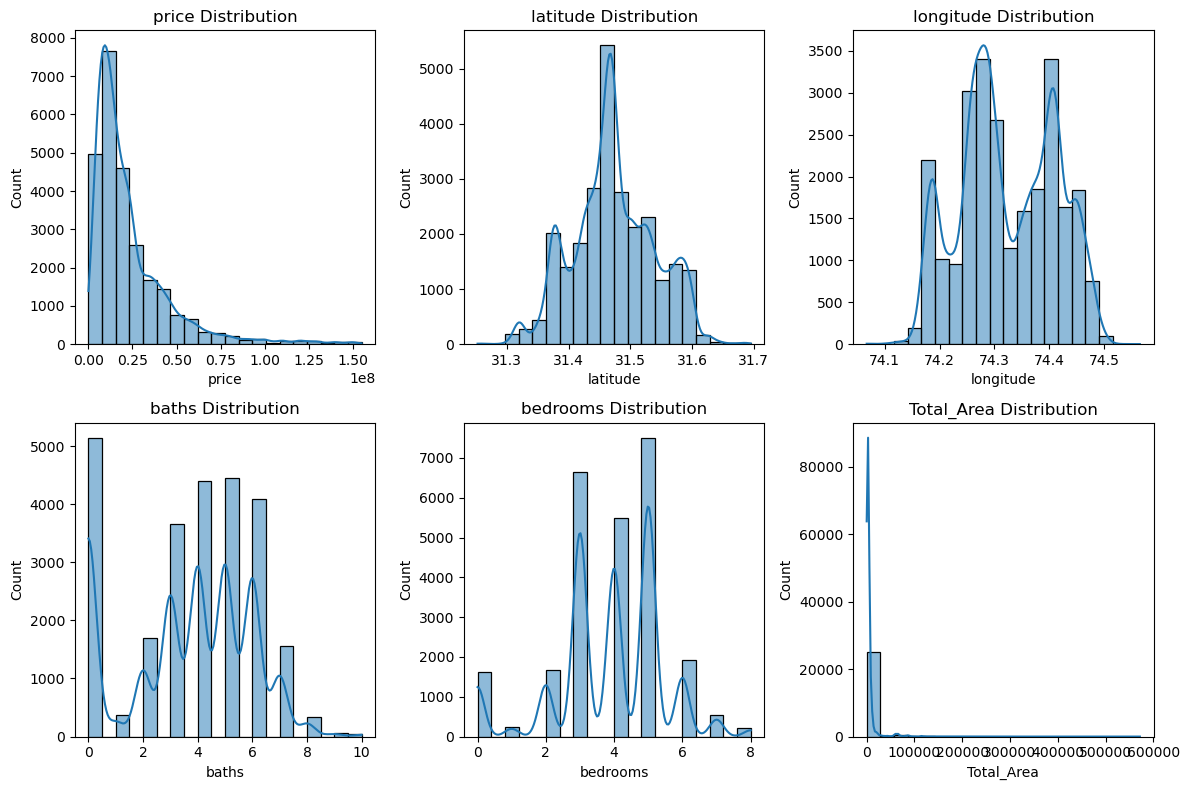

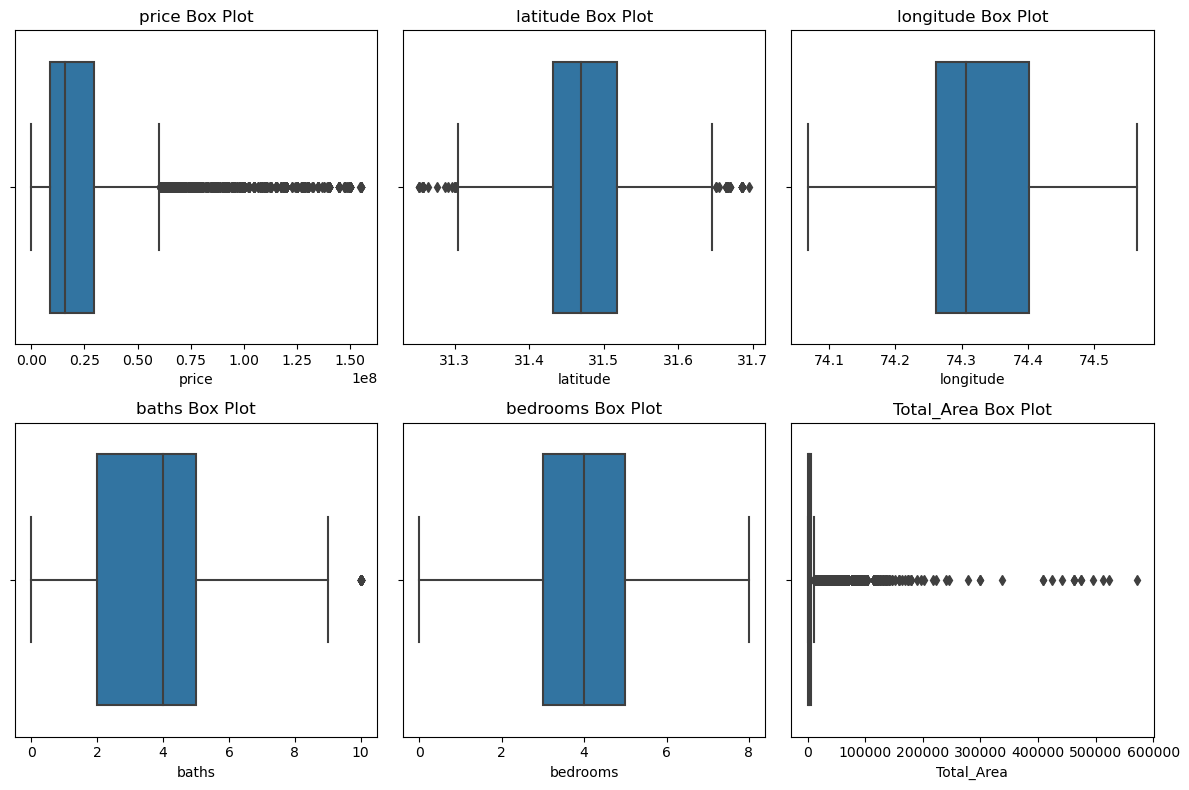

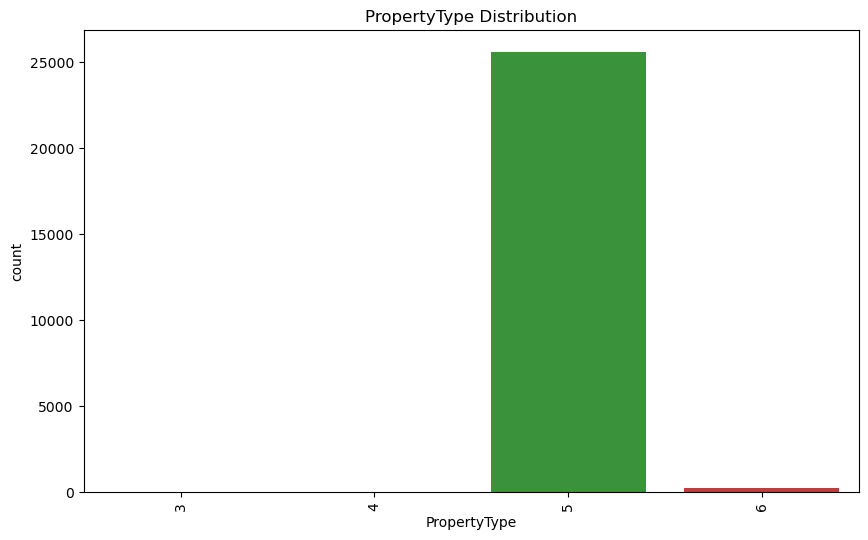

              price      latitude     longitude         baths      bedrooms  \
count  2.583500e+04  25835.000000  25835.000000  25835.000000  25835.000000   
mean   2.331357e+07     31.473063     74.323159      3.633288      3.868937   
std    2.220632e+07      0.066046      0.086358      2.297103      1.577968   
min    1.000000e+00     31.252821     74.067444      0.000000      0.000000   
25%    9.000000e+06     31.431593     74.261127      2.000000      3.000000   
50%    1.600000e+07     31.469155     74.306667      4.000000      4.000000   
75%    2.950000e+07     31.518337     74.401431      5.000000      5.000000   
max    1.550000e+08     31.694905     74.564727     10.000000      8.000000   

          Total_Area  
count   25835.000000  
mean     5945.870158  
std     17517.311879  
min         0.000000  
25%      1361.255000  
50%      2722.510000  
75%      5445.000000  
max    571725.000000  


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visual inspection with histograms and box plots for numeric columns
numeric_columns = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'Total_Area']

# Plot histograms for numeric columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df_cleaned, x=column, bins=20, kde=True)
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()

# Box plots for numeric columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(f'{column} Box Plot')

plt.tight_layout()
plt.show()

# Visual inspection of the 'PropertyType' column using a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='PropertyType')
plt.xticks(rotation=90)
plt.title('PropertyType Distribution')
plt.show()

# Summary statistics for numeric columns
summary_stats = df_cleaned[numeric_columns].describe()
print(summary_stats)


In [80]:
df2=pd.read_csv('A3.CSV')

In [81]:
df2


price   latitude  longitude  baths  bedrooms  Total_Area  \
0      220000000  31.483869  74.325686      0         0   32670.000   
1       40000000  31.431593  74.179980      5         5    5445.000   
2        9500000  31.499348  74.416959      0         3    2450.259   
3      125000000  31.522069  74.355512      7         8    5445.000   
4       21000000  31.506483  74.286017      5         6    2994.761   
...          ...        ...        ...    ...       ...         ...   
85161    2900000  31.458979  74.373565      2         1    7350.777   
85162      20000  31.465422  74.385309      1         1    5445.000   
85163   46000000  31.466227  74.427137      5         4    2722.510   
85164   20000000  31.626564  74.281820      0         0    2722.510   
85165   10000000  31.455465  74.295859      5         5    1361.255   

       PropertyType  
0                 5  
1                 5  
2                 5  
3                 5  
4                 5  
...             ...  
85161             3  
85162             3  
85163             3  
85164             3  
85165             3  

[85166 rows x 7 columns]

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [83]:
df2.PropertyType.value_counts()

5    26083
4    20083
1    16000
2    10000
6     8000
3     5000
Name: PropertyType, dtype: int64

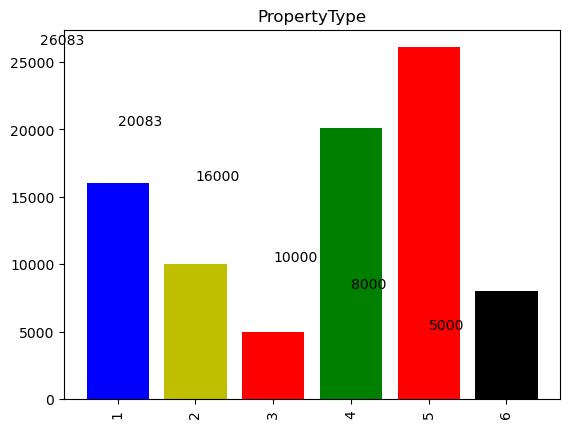

In [84]:
y=df2.PropertyType.value_counts().index
x=df2.PropertyType.value_counts().values
plt.bar(y,x,color=['r','g','b','y','k'])
plt.xticks(rotation = 90)
plt.title("PropertyType")
for index,data in enumerate(x):
    plt.text(x=index , y =data+200 , s=f"{data}" )
plt.show()

#left skewed 

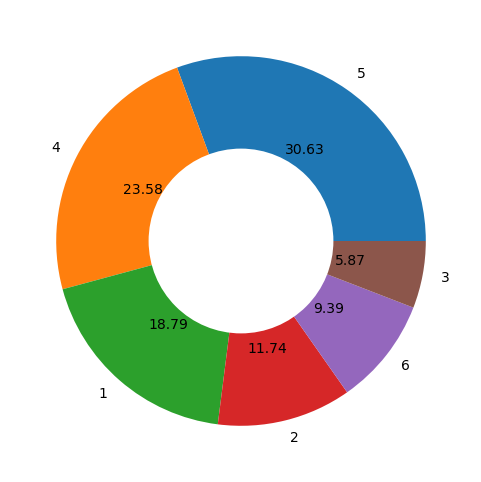

In [88]:
plt.figure(figsize=(6,6))
plt.pie(df2.PropertyType.value_counts().values[:],
              labels=df2.PropertyType.value_counts()[:].index,
               autopct="%0.2f",pctdistance=0.6
                )
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)

In [90]:
adjusted_data=pd.read_csv('A3.CSV')

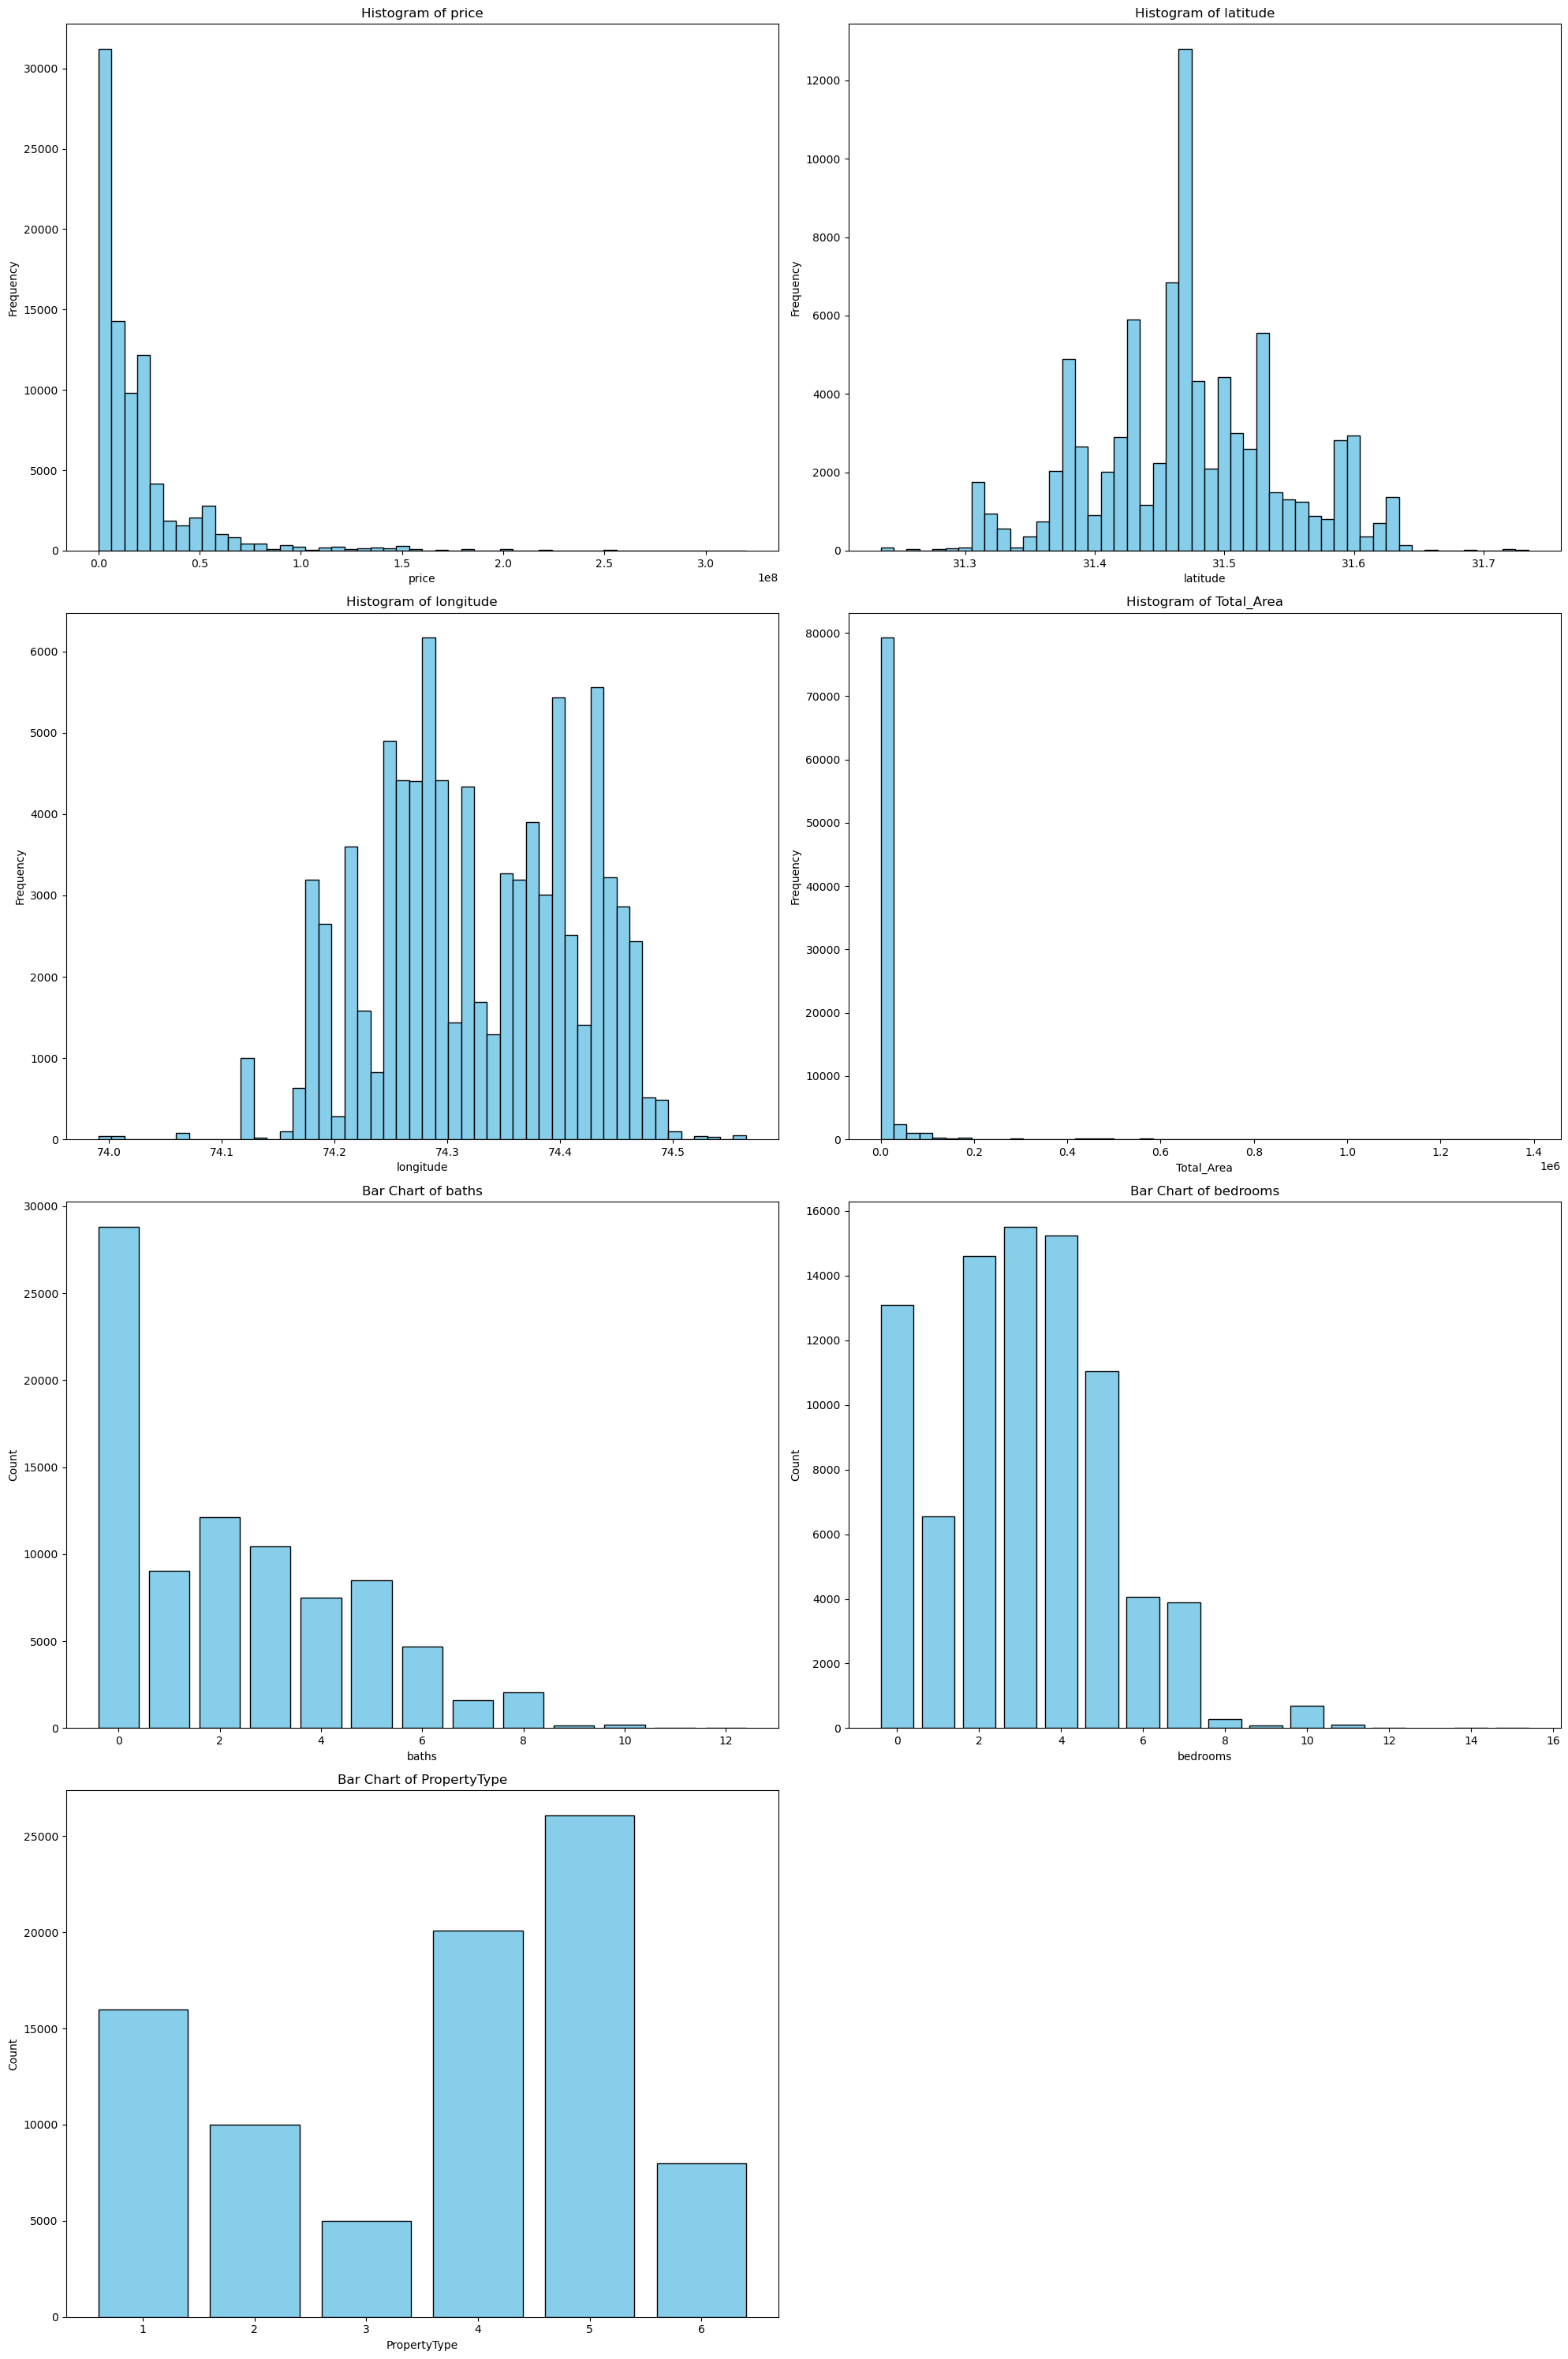

price      latitude     longitude         baths      bedrooms  \
count  8.516600e+04  85166.000000  85166.000000  85166.000000  85166.000000   
mean   1.990599e+07     31.471813     74.325912      2.306801      3.068372   
std    2.706830e+07      0.072647      0.088039      2.281006      2.079314   
min    1.000000e+00     31.234847     73.990433      0.000000      0.000000   
25%    4.500000e+06     31.425294     74.259753      0.000000      2.000000   
50%    1.100000e+07     31.470028     74.322481      2.000000      3.000000   
75%    2.300000e+07     31.521557     74.395373      4.000000      4.000000   
max    3.200000e+08     31.734482     74.564727     12.000000     15.000000   

         Total_Area  PropertyType  
count  8.516600e+04  85166.000000  
mean   1.264843e+04      3.636980  
std    5.473337e+04      1.664164  
min    0.000000e+00      1.000000  
25%    1.361255e+03      2.000000  
50%    2.722510e+03      4.000000  
75%    5.445000e+03      5.000000  
max    1.388475e+06      6.000000

In [91]:
# Summary Statistics
summary_statistics = adjusted_data.describe()

# Univariate Analysis using only matplotlib
fig = plt.figure(figsize=(20, 30))

# Plotting histogram for continuous variables
continuous_vars = ['price', 'latitude', 'longitude', 'Total_Area']
for idx, col in enumerate(continuous_vars):
    ax = fig.add_subplot(4, 2, idx+1)
    ax.hist(adjusted_data[col], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Plotting bar chart for discrete variables
discrete_vars = ['baths', 'bedrooms', 'PropertyType']
for idx, col in enumerate(discrete_vars):
    ax = fig.add_subplot(4, 2, idx+5)
    values = adjusted_data[col].value_counts().index
    frequencies = adjusted_data[col].value_counts().values
    ax.bar(values, frequencies, color='skyblue', edgecolor='black')
    ax.set_title(f'Bar Chart of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

summary_statistics


# Bivariate

In [92]:
adjusted_data.corr()

price  latitude  longitude     baths  bedrooms  Total_Area  \
price         1.000000 -0.026662   0.153275  0.304697  0.178176    0.357310   
latitude     -0.026662  1.000000   0.300456 -0.153043 -0.056156    0.007600   
longitude     0.153275  0.300456   1.000000  0.056329  0.057618    0.116251   
baths         0.304697 -0.153043   0.056329  1.000000  0.609931   -0.017217   
bedrooms      0.178176 -0.056156   0.057618  0.609931  1.000000   -0.089616   
Total_Area    0.357310  0.007600   0.116251 -0.017217 -0.089616    1.000000   
PropertyType  0.436640  0.018545   0.231728  0.291476  0.236428    0.234100   

              PropertyType  
price             0.436640  
latitude          0.018545  
longitude         0.231728  
baths             0.291476  
bedrooms          0.236428  
Total_Area        0.234100  
PropertyType      1.000000

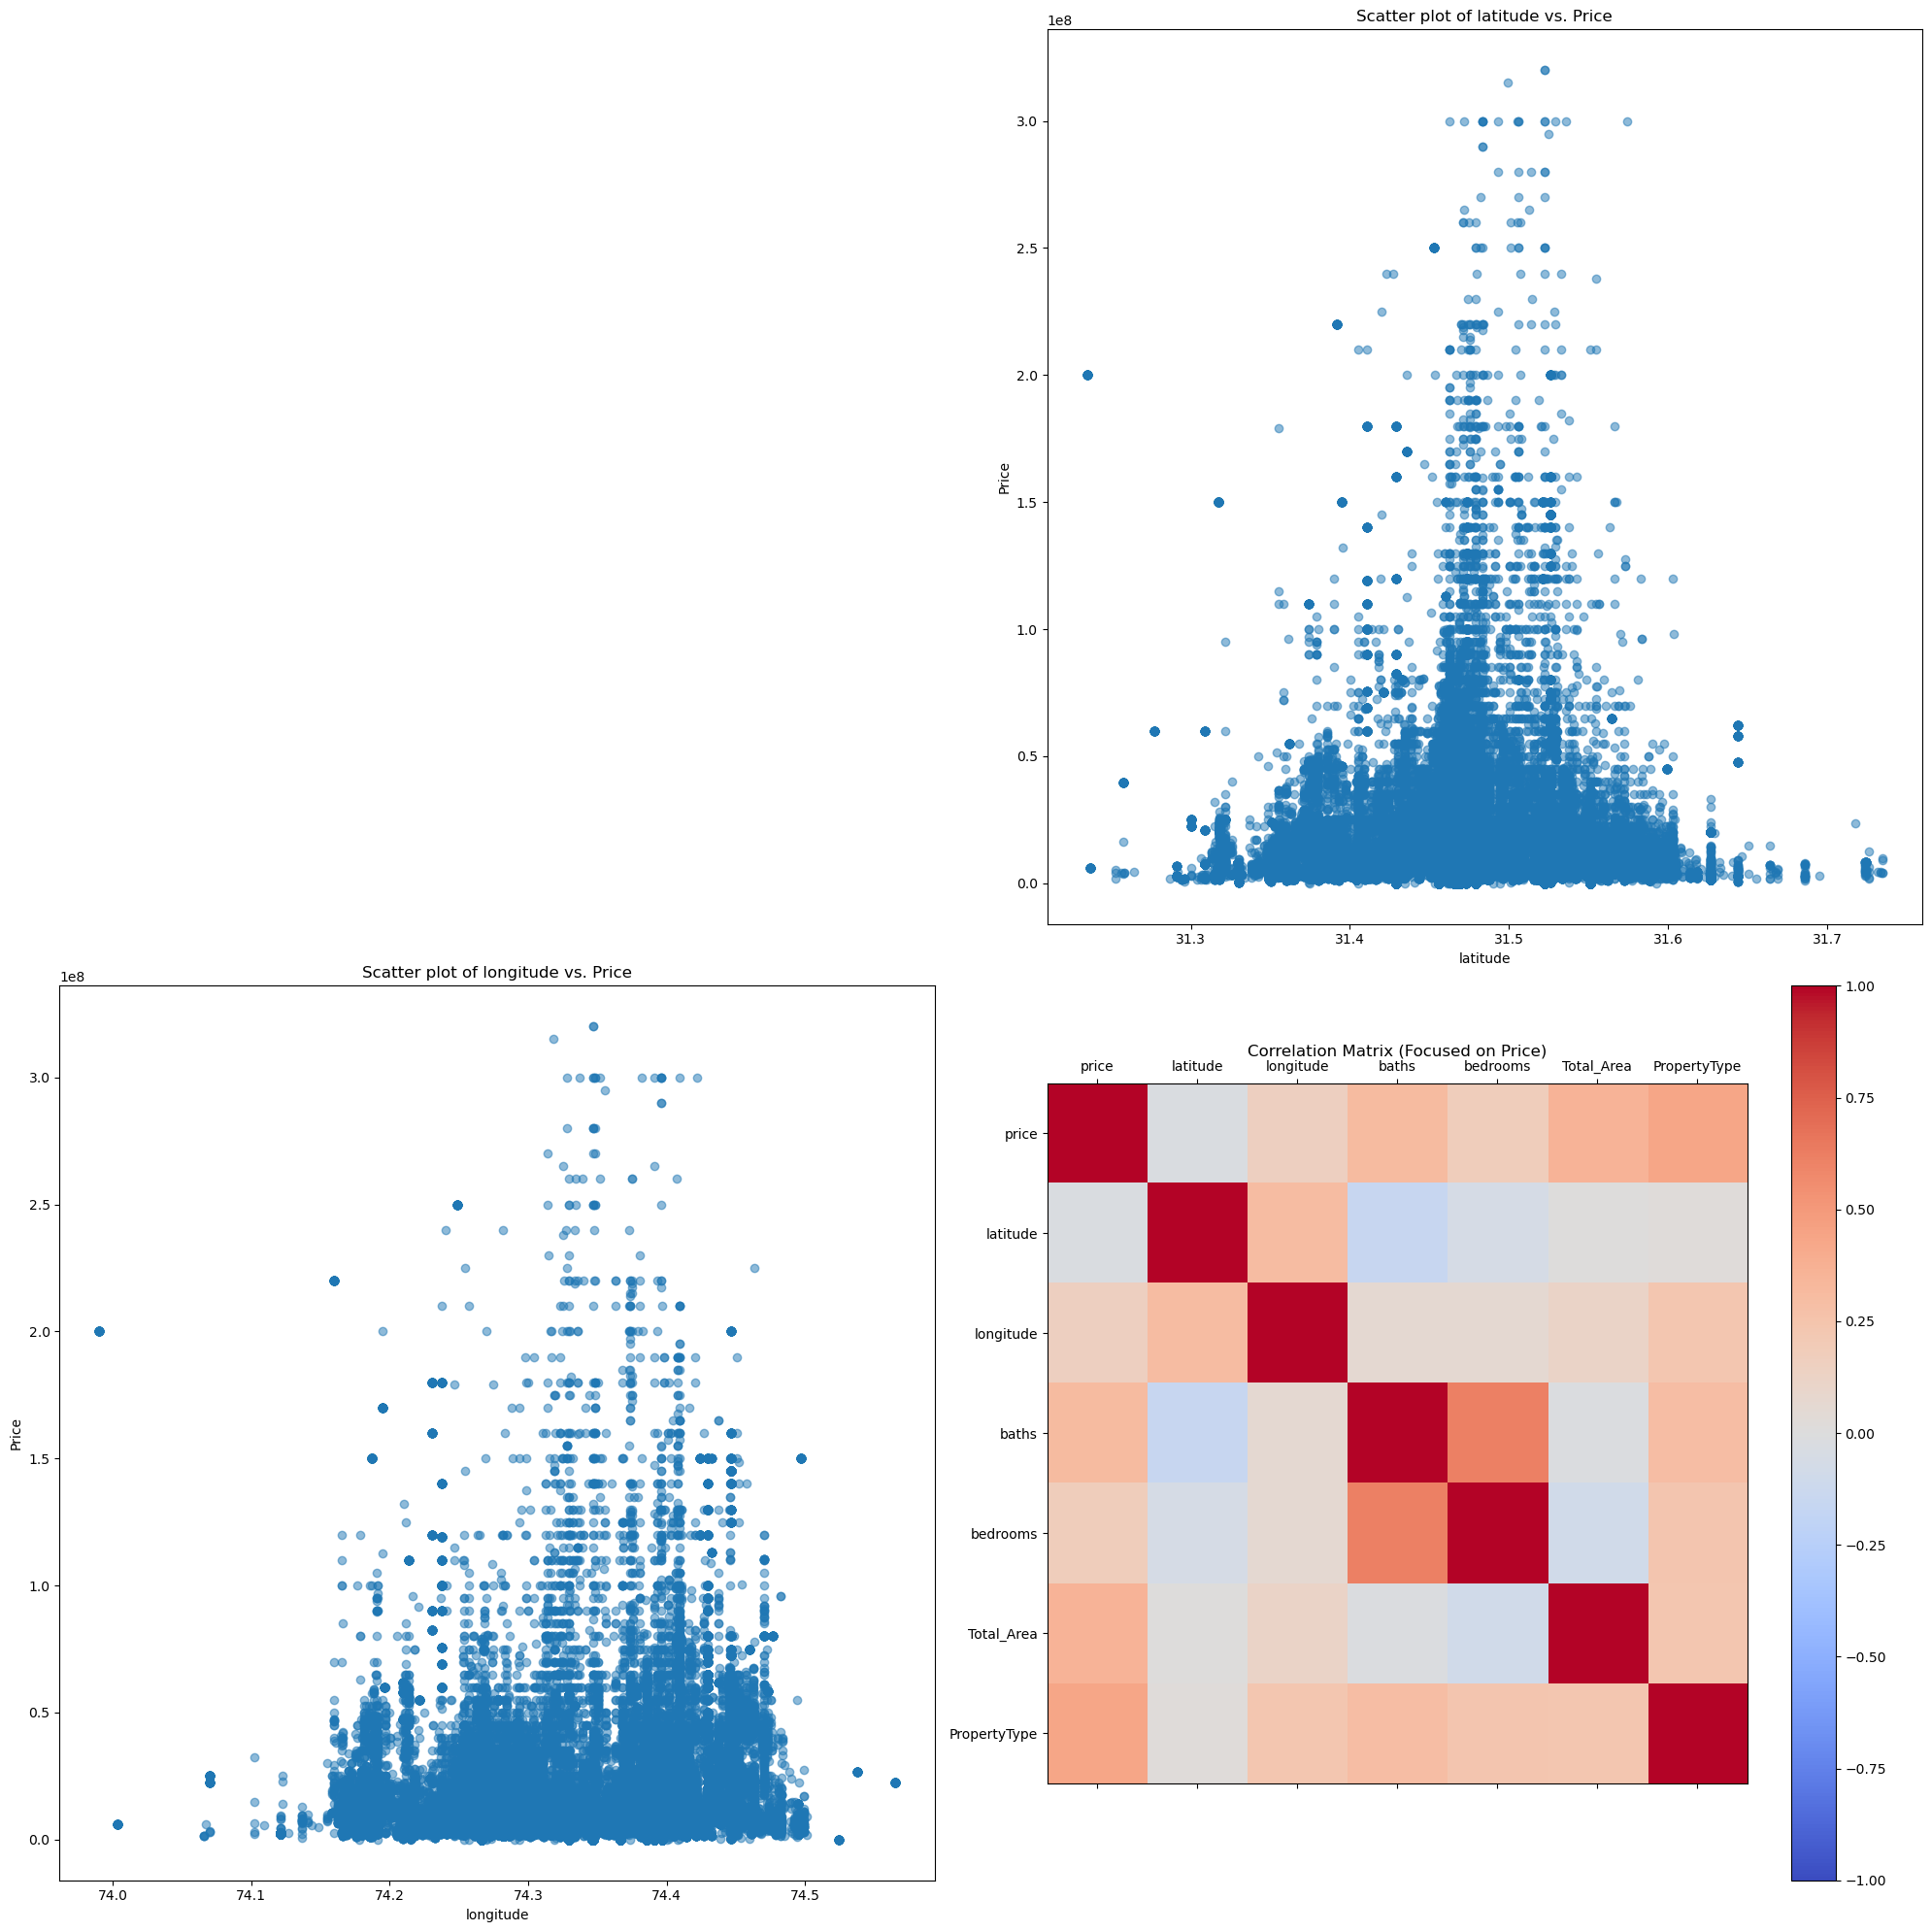

price           1.000000
PropertyType    0.436640
Total_Area      0.357310
baths           0.304697
bedrooms        0.178176
longitude       0.153275
latitude       -0.026662
Name: price, dtype: float64

In [107]:



fig = plt.figure(figsize=(20, 20))


for idx, col in enumerate(continuous_vars[:-1]):  
    if col != 'price':  
        ax = fig.add_subplot(2, 2, idx+1)
        ax.scatter(adjusted_data[col], adjusted_data['price'], alpha=0.5)
        ax.set_title(f'Scatter plot of {col} vs. Price')
        ax.set_xlabel(col)
        ax.set_ylabel('Price')

# Correlation Matrix (focused on price)
correlation_matrix_price = adjusted_data.corr()
ax = fig.add_subplot(2, 2, 4)
cax = ax.matshow(correlation_matrix_price, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(adjusted_data.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(adjusted_data.columns)
ax.set_yticklabels(adjusted_data.columns)
ax.set_title('Correlation Matrix (Focused on Price)', pad=20)

plt.tight_layout()
plt.show()

# Display correlation values related to Price
correlation_with_price = correlation_matrix_price['price'].sort_values(ascending=False)
correlation_with_price


# Descriptive analysis

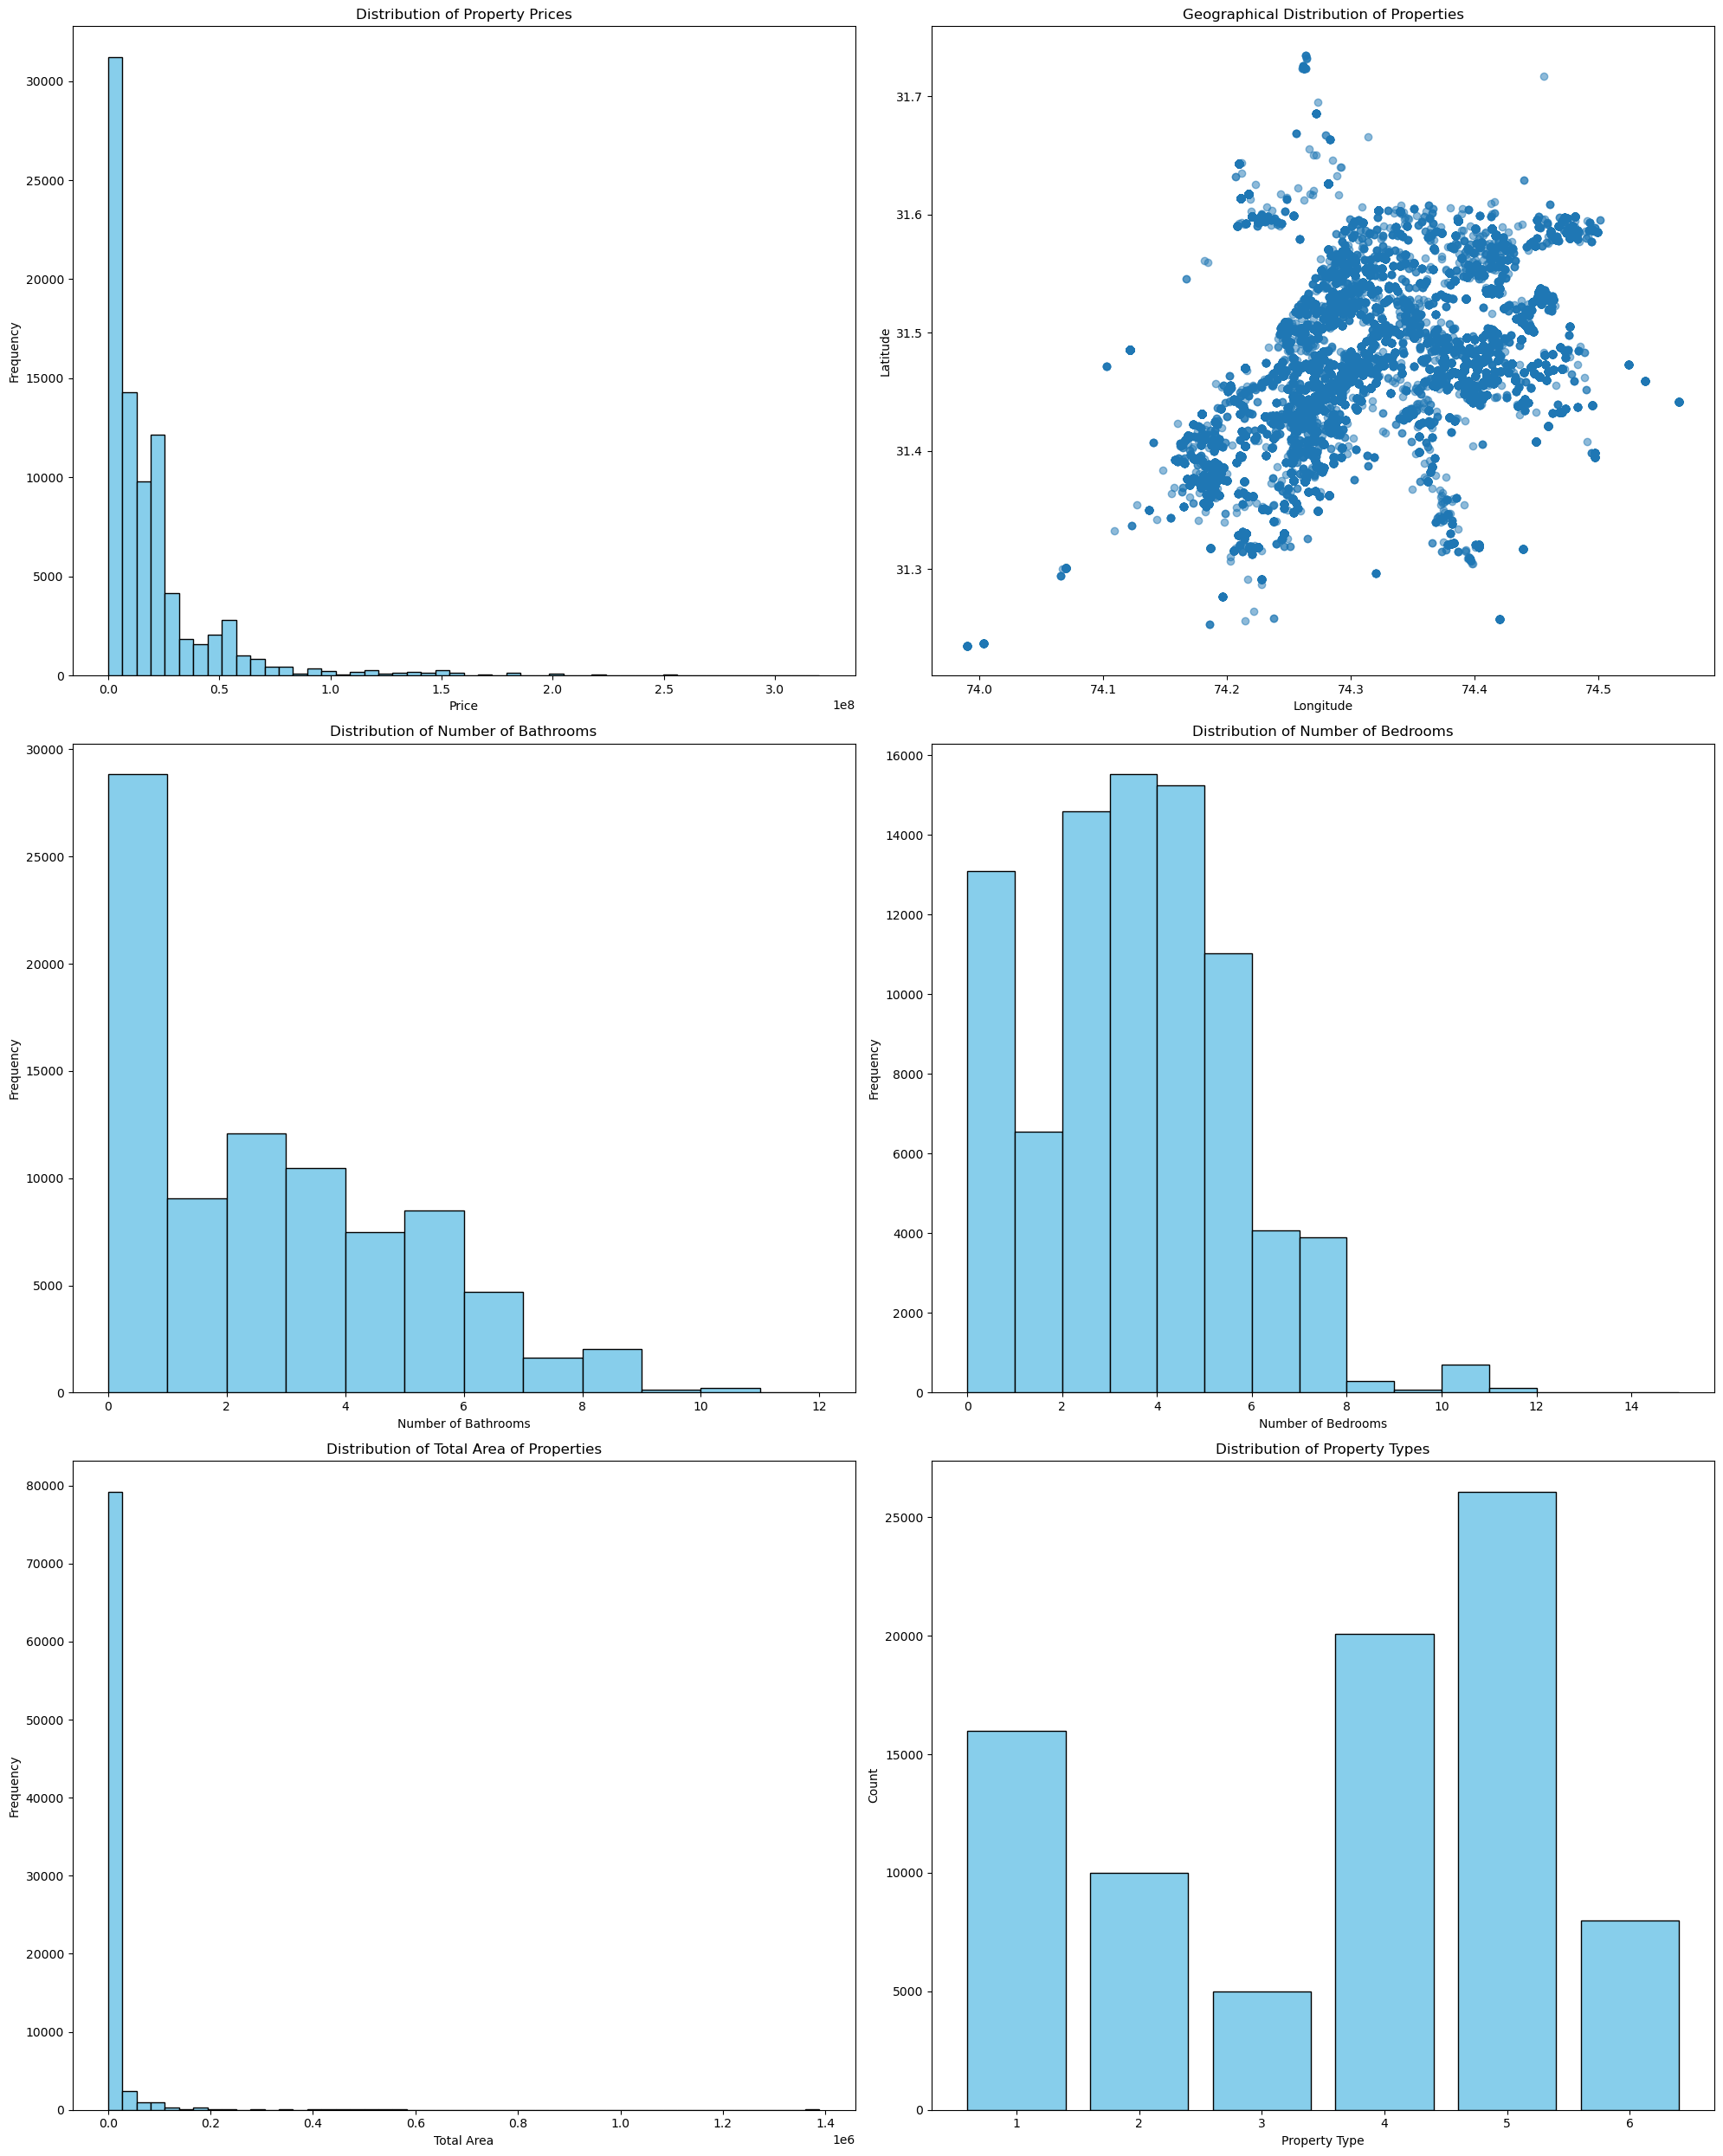

In [98]:
# Descriptive Analysis - Visualization

fig = plt.figure(figsize=(20, 25))

# Histogram for 'price'
ax = fig.add_subplot(3, 2, 1)
ax.hist(adjusted_data['price'], bins=50, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Property Prices')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Scatter plot for 'latitude' and 'longitude'
ax = fig.add_subplot(3, 2, 2)
ax.scatter(adjusted_data['longitude'], adjusted_data['latitude'], alpha=0.5)
ax.set_title('Geographical Distribution of Properties')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Histogram for 'baths'
ax = fig.add_subplot(3, 2, 3)
ax.hist(adjusted_data['baths'], bins=12, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Number of Bathrooms')
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Frequency')

# Histogram for 'bedrooms'
ax = fig.add_subplot(3, 2, 4)
ax.hist(adjusted_data['bedrooms'], bins=15, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Number of Bedrooms')
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Frequency')

# Histogram for 'Total_Area'
ax = fig.add_subplot(3, 2, 5)
ax.hist(adjusted_data['Total_Area'], bins=50, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Total Area of Properties')
ax.set_xlabel('Total Area')
ax.set_ylabel('Frequency')

# Bar chart for 'PropertyType'
ax = fig.add_subplot(3, 2, 6)
values = adjusted_data['PropertyType'].value_counts().index
frequencies = adjusted_data['PropertyType'].value_counts().values
ax.bar(values, frequencies, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Property Types')
ax.set_xlabel('Property Type')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [99]:
adjusted_data.columns

Index(['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'Total_Area',
       'PropertyType'],
      dtype='object')

In [101]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement folium (from versions: none)
ERROR: No matching distribution found for folium


In [111]:
import folium
import folium.plugins # The Folium Javascript Map Library

SF_COORDINATES = (31.5204, 74.3587)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=13)
locs = adjusted_data[['latitude', 'longitude']].astype('float').dropna().to_numpy()
heatmap = folium.plugins.HeatMap(locs.tolist(), radius = 10)
sf_map.add_child(heatmap)

In [113]:
cluster = folium.plugins.MarkerCluster()
for _, r in adjusted_data[['latitude', 'longitude', 'price']].tail(5000).dropna().iterrows():
    cluster.add_child(
        folium.Marker([float(r["latitude"]), float(r["longitude"])], popup=r['price']))
    
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=13)
sf_map.add_child(cluster)
sf_map